# Creating a gradient out of the primes from 0 through 255

## Background

Like many people, I have been fascinated by prime numbers since childhood. I have recently finished reading the book "The Music of the Primes" by Marcus du Sautoy, and decided to see what I could learn about the distributions of primes visually.

## Art out of the primes

This reinvigorated my interest in the primes. I figured looking at the primes from 0 through 255 (the range of RGB color values) would be the perfect place to start.

Although I got this list I used from Wikipedia, and can also be found on the [Online Encyclopedia of Integer Sequences](https://oeis.org/A008578) then figured out how to go from there. As you will note, 1 is no longer considered a prime number, and therefore I have excluded it below:

In [1]:
early_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251]

Next I wanted to know exactly how many primes there were from 0 to 255, and get an idea of how wide the image would be:

In [2]:
len(early_primes)

54

I decided 54 x 54 pixels was too small, so I thought why not use R and G and B side by side to expand the image, and help illustrate and illuminate the distribution for me?

I then imported Python Image Library / pillow, and created the gradient, with columns of an increasingly intense blue in accordance with the scale of the prime compared to the size of the other primes.

Columns are of width c pixels, since I originally went with red, then green, then blue, before going to all blue, which I like looking at a lot better. This is retained in the structure of the get_color function:

In [3]:
from PIL import Image

In [4]:
def get_color(prime_iter): #(c, x, prime_iter):
    n = early_primes[prime_iter]
    return (0, 0, n, 255)
    
    #if x % c == 0:
    #    return (n, 0, 0, 255)
    #elif x % c == 1:
    #    return (0, n, 0, 255)
    #else:
    #    return (0, 0, n, 255)

In [5]:
c = 3
x = len(early_primes) * c
y = x

def newImg():
    i = 0
    j = 0
    prime_iter = -1
    img = Image.new('RGB', (x, y))
    for pxl in range(x * y):
        if i < x:
            
            if i % c == 0:
                prime_iter += 1
                
            img.putpixel((i, j), get_color(prime_iter))
            i += 1
        else:
            i = 0
            j += 1
            prime_iter = -1
            
            if i % c == 0:
                prime_iter += 1
                
            img.putpixel((i, j), get_color(prime_iter))
            i += 1
        

    img.save('early_primes.png')

    return img

wallpaper = newImg()
wallpaper.show()

Here are the results:

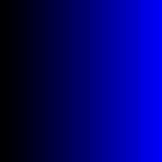